In [1]:
import os
import sys
import pandas as pd
import numpy as np
from glob import glob
from os.path import isfile, join
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

pd.options.display.max_rows = 1000
pd.options.display.max_columns = 100
pd.options.display.max_colwidth = 100
pd.options.display.precision = 8
pd.options.display.float_format = '{:,.3f}'.format

In [11]:
print_timestamp = "%Y/%m/%d %H:%M:%S"
fnames_fname = "filenames.csv"
target_vname = "class"
val_split = 0.5
data_dir = os.path.join("D:"+os.sep, "Users", "gjnet", "Google Drive", "code_projects", "kaggle_ccs", "interim")+os.sep
train_pth = os.path.join(data_dir, "train")+os.sep
val_pth = os.path.join(data_dir, "val")+os.sep
filenames_df = pd.read_csv(data_dir+fnames_fname).sort_values("filename").reset_index(drop=True)
train_files = glob(train_pth+"*.jpg")
if len(train_files) == 0:
    for outcome in filenames_df[target_vname].drop_duplicates():
        train_files += glob(train_pth+outcome+os.sep+"*.jpg")
train_files = pd.Series(train_files, index=filenames_df.index, name="filepath").sort_values().reset_index(drop=True)
filenames_df = pd.concat([filenames_df, train_files], axis=1)
filenames_df.head()

,filename,class,filepath
0,trn_0_add_t2.jpg,Type_2,D:\Users\gjnet\Google Drive\code_projects\kaggle_ccs\interim\train\Type_1\trn_1000_add_t1.jpg
1,trn_1000_add_t1.jpg,Type_1,D:\Users\gjnet\Google Drive\code_projects\kaggle_ccs\interim\train\Type_1\trn_1001_add_t1.jpg
2,trn_1001_add_t1.jpg,Type_1,D:\Users\gjnet\Google Drive\code_projects\kaggle_ccs\interim\train\Type_1\trn_1005_add_t1.jpg
3,trn_1002_add_t2.jpg,Type_2,D:\Users\gjnet\Google Drive\code_projects\kaggle_ccs\interim\train\Type_1\trn_1009_add_t1.jpg
4,trn_1005_add_t1.jpg,Type_1,D:\Users\gjnet\Google Drive\code_projects\kaggle_ccs\interim\train\Type_1\trn_1011_add_t1.jpg


In [12]:
outcomes = filenames_df[target_vname].drop_duplicates().values
data_pths = dict(zip(["train", "val"], [train_pth, val_pth]))
export_pths = dict()

for ml_dtype in data_pths.keys():
    export_pths[ml_dtype] = dict()
    for val in outcomes:
        export_pths[ml_dtype][val] = os.path.join(data_pths[ml_dtype], val)+os.sep
        os.makedirs(export_pths[ml_dtype][val], exist_ok=True)

In [13]:
data_splt = train_test_split(filenames_df.index, test_size=val_split, stratify=filenames_df[target_vname], shuffle=True, random_state=123)

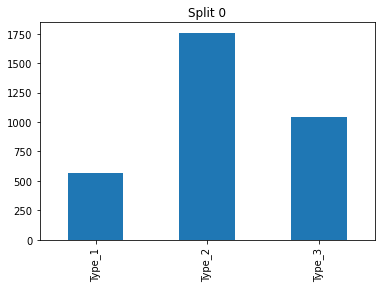

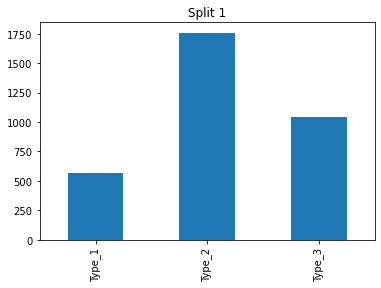

In [14]:
for i in range(len(data_splt)):
    filenames_df.loc[data_splt[i], target_vname].value_counts(dropna=False).sort_index().plot(kind="bar", title="Split "+str(i))
    plt.show()

In [15]:
train_data = filenames_df.loc[data_splt[0]]
val_data = filenames_df.loc[data_splt[1]]

In [16]:
train_data.head(2)

,filename,class,filepath
1314,trn_2437_add_t2.jpg,Type_2,D:\Users\gjnet\Google Drive\code_projects\kaggle_ccs\interim\train\Type_2\trn_1357_nadd_t2.jpg
6350,vld_219_nadd_t2.jpg,Type_2,D:\Users\gjnet\Google Drive\code_projects\kaggle_ccs\interim\train\Type_3\trn_6285_add_t3.jpg


In [17]:
val_data.head(2)

,filename,class,filepath
3674,trn_4790_add_t3.jpg,Type_3,D:\Users\gjnet\Google Drive\code_projects\kaggle_ccs\interim\train\Type_2\trn_584_add_t2.jpg
5924,trn_727_add_t2.jpg,Type_2,D:\Users\gjnet\Google Drive\code_projects\kaggle_ccs\interim\train\Type_3\trn_5416_add_t3.jpg


In [19]:
for outcome in export_pths["train"]:
    for ind in train_data[(train_data[target_vname] == outcome)].index:
        try:
            os.rename(train_data.loc[ind, "filepath"], export_pths["train"][outcome]+train_data.loc[ind, "filename"])
        except FileExistsError:
            break

In [20]:
for outcome in export_pths["val"]:
    for ind in val_data[(val_data[target_vname] == outcome)].index:
        os.rename(val_data.loc[ind, "filepath"], export_pths["val"][outcome]+val_data.loc[ind, "filename"])